In [97]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import os
%matplotlib inline

### Below code snippet is to load the portion of the data on sample basis if in case the total data load is not possible due to system configuration
Currently it is being commented and the complete data is being loaded

In [99]:
filename = "application_data.csv"

# finding the total number of rows in the file without loading the file
num_lines = sum(1 for l in open(filename))

# Sample size: 50%

size = int(num_lines//5)

random.seed(100)
skip_id = random.sample(range(1, num_lines), num_lines-size)

#a_df = pd.read_csv(filename, skiprows = skip_id)

In [100]:
a_df = pd.read_csv('application_data.csv')

In [101]:
a_df.shape

(307511, 122)

In [102]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 50)

### 1. Cleaning the data
#### 1.1 Drop all the columns which has more than 47% of data
47% is chosen because some of the variables missing values are from 47% to 70%. The next lesser one is around 31% and we will live with it for now.

In [103]:
a_df.isnull().mean() * 100

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
                                ...    
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
Length: 122, dtype: float64

In [104]:
a_df.dropna(axis=1, thresh=int(len(a_df)*0.53), inplace=True)

In [105]:
a_df.shape

(307511, 73)

#### 1.2 Identify further any columns which can be grouped to a single column
It is observed the about 21 columns are exist to identify whether 21 different documents are received for the application. As each document existence may not help in analysis as significance of the document is also unknow. Let, identify only the no. of documents available for each application and drop off all individual document existence columns.

In [106]:
a_df.FLAG_DOCUMENT_2.value_counts(normalize=True)

0    0.999958
1    0.000042
Name: FLAG_DOCUMENT_2, dtype: float64

In [107]:
a_df['NO_OF_DOCUMENTS'] = sum([a_df["FLAG_DOCUMENT_"+str(i)] for i in range(3,22)])

In [108]:
a_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,...,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,NO_OF_DOCUMENTS
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,1
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,1
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [109]:
a_df.NO_OF_DOCUMENTS.value_counts()

1    270043
0     29562
2      7742
3       163
4         1
Name: NO_OF_DOCUMENTS, dtype: int64

In [110]:
a_df.drop(a_df.loc[:,'FLAG_DOCUMENT_2':'FLAG_DOCUMENT_21'],inplace=True,axis=1)

In [111]:
a_df.shape

(307511, 54)

#### The remaining columns after dropping unnecessary columns for analysis

In [112]:
a_df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_C

#### Identify the variety of values against each column to understand whether it is continuous or categorical columns.

In [113]:
a_df.nunique().sort_values()

FLAG_EMAIL                          2
FLAG_WORK_PHONE                     2
FLAG_CONT_MOBILE                    2
FLAG_PHONE                          2
REG_REGION_NOT_LIVE_REGION          2
REG_REGION_NOT_WORK_REGION          2
LIVE_REGION_NOT_WORK_REGION         2
FLAG_EMP_PHONE                      2
REG_CITY_NOT_LIVE_CITY              2
LIVE_CITY_NOT_WORK_CITY             2
FLAG_OWN_REALTY                     2
FLAG_OWN_CAR                        2
NAME_CONTRACT_TYPE                  2
TARGET                              2
REG_CITY_NOT_WORK_CITY              2
FLAG_MOBIL                          2
REGION_RATING_CLIENT_W_CITY         3
REGION_RATING_CLIENT                3
CODE_GENDER                         3
AMT_REQ_CREDIT_BUREAU_HOUR          5
NO_OF_DOCUMENTS                     5
NAME_EDUCATION_TYPE                 5
NAME_HOUSING_TYPE                   6
NAME_FAMILY_STATUS                  6
WEEKDAY_APPR_PROCESS_START          7
NAME_TYPE_SUITE                     7
NAME_INCOME_

In [114]:
a_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 54 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

### Identify the columns and change the dtype based on the range of the data available
#### Below columns which are currently float in type can be converted to int.
- DAYS_REGISTRATION
- CNT_FAM_MEMBERS - It is not converted, but the code snipped to convert is been put as imputation is not recommended.
- DAYS_LAST_PHONE_CHANGE - It is not converted, but the code snipped to convert is been put as imputation is not recommended.

In [115]:
a_df.DAYS_REGISTRATION.value_counts()

-1.0        113
-7.0         98
-6.0         96
-2.0         92
-4.0         92
           ... 
-12446.0      1
-17298.0      1
-14676.0      1
-15817.0      1
-13267.0      1
Name: DAYS_REGISTRATION, Length: 15688, dtype: int64

In [116]:
a_df.DAYS_REGISTRATION = a_df.DAYS_REGISTRATION.astype('int')

In [117]:
a_df.DAYS_REGISTRATION.value_counts()

-1        113
-7         98
-6         96
-4         92
-2         92
         ... 
-16662      1
-14486      1
-15894      1
-20571      1
-16359      1
Name: DAYS_REGISTRATION, Length: 15687, dtype: int64

In [118]:
a_df.CNT_FAM_MEMBERS.value_counts()

2.0     158357
1.0      67847
3.0      52601
4.0      24697
5.0       3478
6.0        408
7.0         81
8.0         20
9.0          6
10.0         3
14.0         2
16.0         2
12.0         2
20.0         2
11.0         1
13.0         1
15.0         1
Name: CNT_FAM_MEMBERS, dtype: int64

In [119]:
#a_df.CNT_FAM_MEMBERS = a_df.CNT_FAM_MEMBERS.fillna(0)
#a_df.CNT_FAM_MEMBERS = a_df.CNT_FAM_MEMBERS.astype('int')

In [120]:
a_df.DAYS_LAST_PHONE_CHANGE.value_counts()

 0.0       37672
-1.0        2812
-2.0        2318
-3.0        1763
-4.0        1285
           ...  
-3558.0        1
-3978.0        1
-3701.0        1
-3809.0        1
-3731.0        1
Name: DAYS_LAST_PHONE_CHANGE, Length: 3773, dtype: int64

In [121]:
#a_df.DAYS_LAST_PHONE_CHANGE.fillna(0)
#a_df.DAYS_LAST_PHONE_CHANGE = a_df.DAYS_LAST_PHONE_CHANGE.astype('int')

### 1.3 Identifying the columns with less missing values and proposing the better ways to impute the columns.
#### The below variables have less than 1% missing values. It can be imputed with the median values in each case as first two variables are numeric with some outliers and hence cannot impute with mean. The last variable is categorical with values concentrated against one category mostly.
1. AMT_ANNUITY - Impute with the median value 24,750
2. AMT_GOODS_PRICE - Impute with the median value 4,50,000
3. NAME_TYPE_SUITE - Impute with the mode vaue 'Unaccompanied'

#### The below categorical variable has about 31%, if required this can be imputed with the mode value which has high concentration
4. OCCUPATION_TYPE - Impute with the mode vaue 'Laborers'

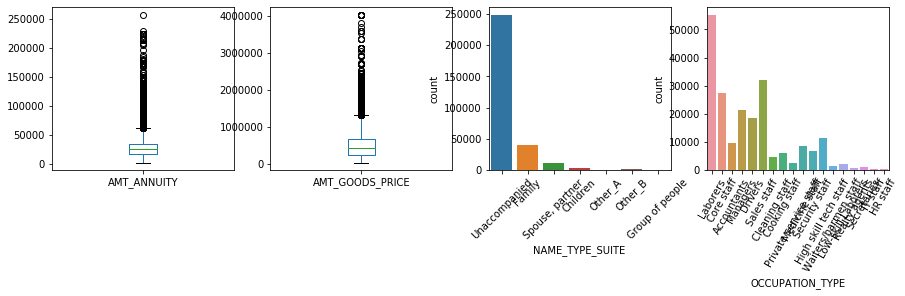

In [122]:
plt.figure(figsize=(15,3))

plt.subplot(141)
a_df.AMT_ANNUITY.plot.box()
plt.subplot(142)
a_df.AMT_GOODS_PRICE.plot.box()
plt.subplot(143)
sns.countplot(a_df.NAME_TYPE_SUITE, orient='v')
plt.xticks(rotation = 45)
plt.subplot(144)
sns.countplot(a_df.OCCUPATION_TYPE, orient='v')
plt.xticks(rotation = 60)

plt.show()

In [123]:
a_df.AMT_ANNUITY.describe()

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

In [124]:
round(a_df.AMT_GOODS_PRICE.describe(),2)

count     307233.00
mean      538396.21
std       369446.46
min        40500.00
25%       238500.00
50%       450000.00
75%       679500.00
max      4050000.00
Name: AMT_GOODS_PRICE, dtype: float64

In [125]:
a_df.isnull().mean() * 100

SK_ID_CURR                      0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.000000
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
AMT_ANNUITY                     0.003902
AMT_GOODS_PRICE                 0.090403
NAME_TYPE_SUITE                 0.420148
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
REGION_POPULATION_RELATIVE      0.000000
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
DAYS_REGISTRATION               0.000000
DAYS_ID_PUBLISH                 0.000000
FLAG_MOBIL                      0.000000
FLAG_EMP_PHONE                  0.000000
FLAG_WORK_PHONE                 0.000000
FLAG_CONT_MOBILE

#### The below variables also has some missing values
- EXT_SOURCE_2 - 0.2%
- EXT_SOURCE_3 - 20%
##### As both the variables do not have any outliers as depicted in box plot. The missing values must be imputed with the mean of the varibles which is 0.51 for both the variables as describe functionlity shows.

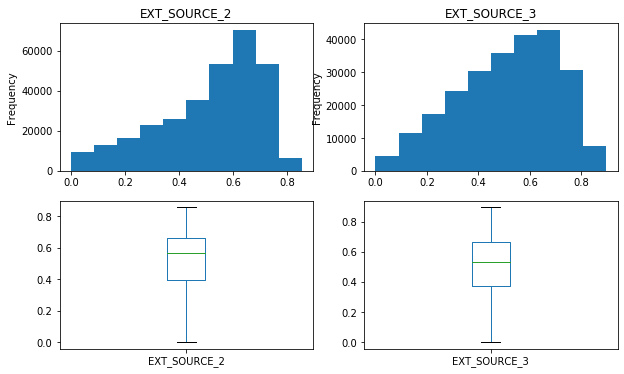

In [126]:
plt.figure(figsize=(10,6))

plt.subplot(221)
plt.title('EXT_SOURCE_2')
a_df.EXT_SOURCE_2.plot.hist()
plt.subplot(222)
plt.title('EXT_SOURCE_3')
a_df.EXT_SOURCE_3.plot.hist()

plt.subplot(223)
a_df.EXT_SOURCE_2.plot.box()
plt.subplot(224)
a_df.EXT_SOURCE_3.plot.box()

plt.show()

In [127]:
round(a_df.EXT_SOURCE_2.describe(),2)

count    306851.00
mean          0.51
std           0.19
min           0.00
25%           0.39
50%           0.57
75%           0.66
max           0.85
Name: EXT_SOURCE_2, dtype: float64

In [128]:
a_df.EXT_SOURCE_3.describe()

count    246546.000000
mean          0.510853
std           0.194844
min           0.000527
25%           0.370650
50%           0.535276
75%           0.669057
max           0.896010
Name: EXT_SOURCE_3, dtype: float64

#### The variables with no. of observations of social surroundings have about 0.4% missing values.
As all the variables are highly concentrated at the value 0, the missing values can be imputed with 0. As the box plot clearly shows all the variables has outliers & majority of the data is concentrated at the value 0.

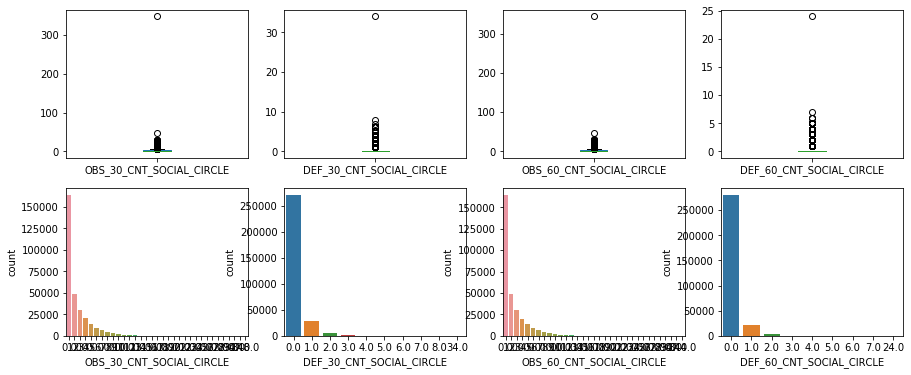

In [129]:
plt.figure(figsize=(15,6))
plt.subplot(241)
a_df.OBS_30_CNT_SOCIAL_CIRCLE.plot.box()
plt.subplot(242)
a_df.DEF_30_CNT_SOCIAL_CIRCLE.plot.box()
plt.subplot(243)
a_df.OBS_60_CNT_SOCIAL_CIRCLE.plot.box()
plt.subplot(244)
a_df.DEF_60_CNT_SOCIAL_CIRCLE.plot.box()
plt.subplot(245)
sns.countplot(a_df.OBS_30_CNT_SOCIAL_CIRCLE)
plt.subplot(246)
sns.countplot(a_df.DEF_30_CNT_SOCIAL_CIRCLE)
plt.subplot(247)
sns.countplot(a_df.OBS_60_CNT_SOCIAL_CIRCLE)
plt.subplot(248)
sns.countplot(a_df.DEF_60_CNT_SOCIAL_CIRCLE)

plt.show()

In [130]:
a_df.OBS_30_CNT_SOCIAL_CIRCLE.describe()

count    306490.000000
mean          1.422245
std           2.400989
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         348.000000
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: float64

In [131]:
a_df.OBS_60_CNT_SOCIAL_CIRCLE.describe()

count    306490.000000
mean          1.405292
std           2.379803
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         344.000000
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: float64

#### All the below variables which has about 13% missing values can be imputed with the below approach
1. AMT_REQ_CREDIT_BUREAU_HOUR - Majority of the values are 0, hence impute null values with 0.
2. AMT_REQ_CREDIT_BUREAU_DAY - Majority of the values are 0, hence impute null values with 0.
3. AMT_REQ_CREDIT_BUREAU_WEEK - Majority of the values are 0, hence impute null values with 0.
4. AMT_REQ_CREDIT_BUREAU_MON - Majority of the values are 0, hence impute null values with 0.
5. AMT_REQ_CREDIT_BUREAU_QRT - Majority of the values are 0, hence impute null values with 0.
##### 6. AMT_REQ_CREDIT_BUREAU_YEAR - In contrast with the above five varibales, this one is slightly distributed away from 0. As showcased in the next Box plot & describe functioality, it is good to impute with mode value which is 1.

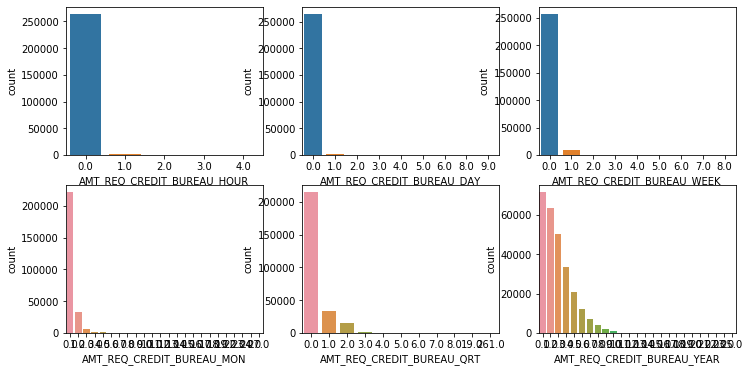

In [132]:
plt.figure(figsize=(12,6))
plt.subplot(231)
sns.countplot(a_df.AMT_REQ_CREDIT_BUREAU_HOUR)
plt.subplot(232)
sns.countplot(a_df.AMT_REQ_CREDIT_BUREAU_DAY)
plt.subplot(233)
sns.countplot(a_df.AMT_REQ_CREDIT_BUREAU_WEEK)
plt.subplot(234)
sns.countplot(a_df.AMT_REQ_CREDIT_BUREAU_MON)
plt.subplot(235)
sns.countplot(a_df.AMT_REQ_CREDIT_BUREAU_QRT)
plt.subplot(236)
sns.countplot(a_df.AMT_REQ_CREDIT_BUREAU_YEAR)
plt.show()

As shown in the below box plot and describe functionality, the attribute AMT_REQ_CREDIT_BUREAU_YEAR has density away from 0 as well unlike the other similar 5 variables. As the box plot suggests, it has some outliers but with mode 1. It is good to impute this one alone with value 1.

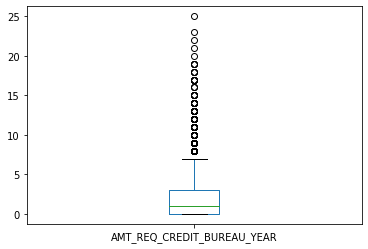

In [133]:
a_df.AMT_REQ_CREDIT_BUREAU_YEAR.plot.box()
plt.show()

In [134]:
a_df.AMT_REQ_CREDIT_BUREAU_YEAR.describe()

count    265992.000000
mean          1.899974
std           1.869295
min           0.000000
25%           0.000000
50%           1.000000
75%           3.000000
max          25.000000
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64

In [135]:
a_df.AMT_REQ_CREDIT_BUREAU_QRT.describe()

count    265992.000000
mean          0.265474
std           0.794056
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         261.000000
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64

In [136]:
a_df.to_csv('appl_data_post_missing_values.csv')

In [137]:
a_df.shape

(307511, 54)

In [138]:
a_df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,NO_OF_DOCUMENTS
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,3.068510e+05,246546.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,307511.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120327,-2994.202373,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,5.143927e-01,0.510853,1.422245,0.143421,1.405292,0.100049,-962.858788,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974,0.930113
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,3522.886321,1509.450419,0.001803,0.384280,0.399526,0.043164,0.449521,0.231307,0.910682,0.509034,0.502737,3.265832,0.122126,0.219526,0.197499,0.268444,0.421124,0.383817,1.910602e-01,0.194844,2.400989,0.446698,2.379803,0.362291,826.808487,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295,0.344347
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,-24672.000000,-7197.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.173617e-08,0.000527,0.000000,0.000000,0.000000,0.000000,-4292.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,-7479.500000,-4299.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,2.000000,2.000000,2.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.924574e-01,0.370650,0.000000,0.000000,0.000000,0.000000,-1570.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,-4504.000000,-3254.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,2.000000,2.000000,2.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.659614e-01,0.535276,0.000000,0.000000,0.000000,0.000000,-757.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,-2010.000000,-1720.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,3.000000,2.000000,2.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.636171e-01,0.669057,2.000000,0.000000,2.000000,0.000000,-274.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000
max,456255.000000,1.00000

### 1.4 Identifying the columns with no. of days in negative and making the numbers into postive for clear analysis
All the below days columns are stored in negative values to indicate how many days back the respective action happened. It is required to convert these columns into positive values for clear analysis.

In [139]:
a_df.DAYS_BIRTH = a_df.DAYS_BIRTH.abs()
a_df.DAYS_EMPLOYED = a_df.DAYS_EMPLOYED.abs()
a_df.DAYS_REGISTRATION = a_df.DAYS_REGISTRATION.abs()
a_df.DAYS_ID_PUBLISH = a_df.DAYS_ID_PUBLISH.abs()
a_df.DAYS_LAST_PHONE_CHANGE = a_df.DAYS_LAST_PHONE_CHANGE.abs()

#### 1.5 Identifying the outliers in some of the continuous columns and proposing right ways to deal with it.

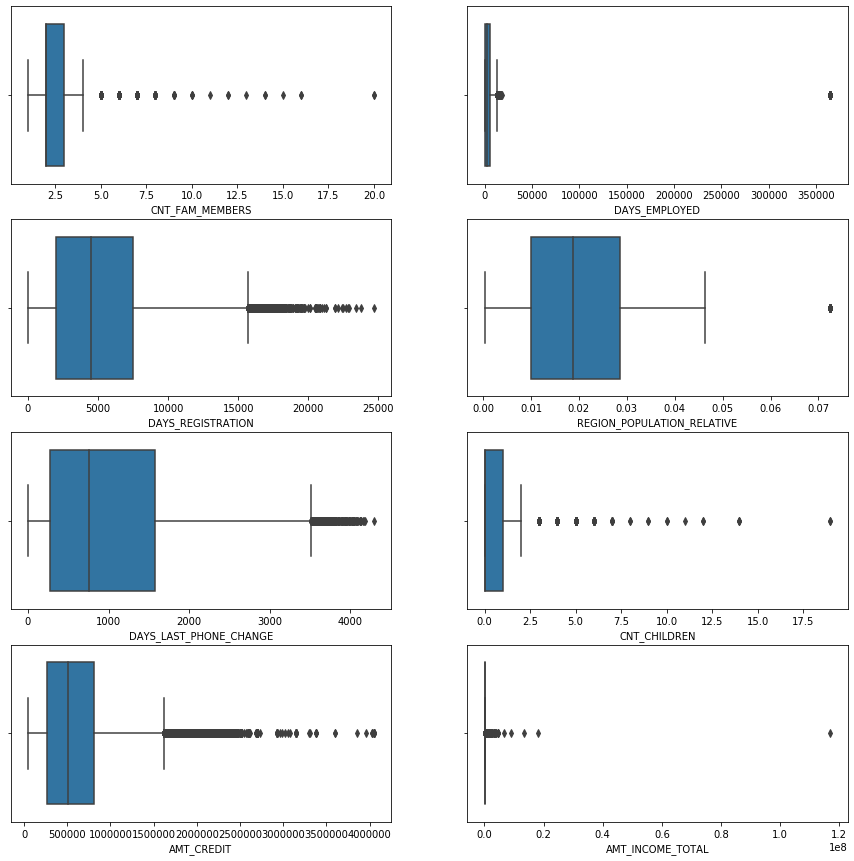

In [140]:
plt.figure(figsize=(15,15))
plt.subplot(421)
sns.boxplot(a_df.CNT_FAM_MEMBERS)
plt.subplot(422)
sns.boxplot(a_df.DAYS_EMPLOYED)
plt.subplot(423)
sns.boxplot(a_df.DAYS_REGISTRATION)
plt.subplot(424)
sns.boxplot(a_df.REGION_POPULATION_RELATIVE)
plt.subplot(425)
sns.boxplot(a_df.DAYS_LAST_PHONE_CHANGE)
plt.subplot(426)
sns.boxplot(a_df.CNT_CHILDREN)
plt.subplot(427)
sns.boxplot(a_df.AMT_CREDIT)
plt.subplot(428)
sns.boxplot(a_df.AMT_INCOME_TOTAL)

plt.show()

#### With above box plots itsquite clear that some of the continuous columns do have outliers.
However, we will identify only the below columns to deal with as these columns has outliers too distinct

1. CNT_FAM_MEMBERS
2. CNT_CHILDREN
3. DAYS_EMPLOYED
4. REGION_POPULATION_RELATIVE
5. AMT_INCOME_TOTAL

In [141]:
a_df.CNT_CHILDREN.value_counts()

0     215371
1      61119
2      26749
3       3717
4        429
5         84
6         21
7          7
14         3
19         2
12         2
10         2
9          2
8          2
11         1
Name: CNT_CHILDREN, dtype: int64

In [142]:
a_df.CNT_FAM_MEMBERS.value_counts()

2.0     158357
1.0      67847
3.0      52601
4.0      24697
5.0       3478
6.0        408
7.0         81
8.0         20
9.0          6
10.0         3
14.0         2
16.0         2
12.0         2
20.0         2
11.0         1
13.0         1
15.0         1
Name: CNT_FAM_MEMBERS, dtype: int64

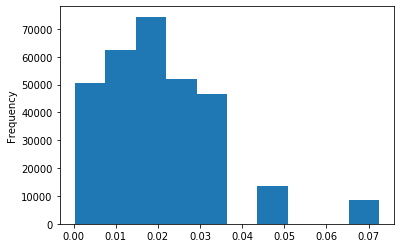

In [143]:
a_df.REGION_POPULATION_RELATIVE.plot.hist()
plt.show()

#### Drop off the rows with outlier values in each of the column as it may skew up the analysis

In [144]:
a_df.shape

(307511, 54)

#### Dropoff the rows with outlier FAMILY MEMBER COUNT as it may skew up the analysis
Not executing the below command as it was suggested only to propose the strategy

In [145]:
#a_df = a_df[a_df.CNT_FAM_MEMBERS < 8]

#### Dropoff the rows with outlier CHILDREN COUNT as it may skew up the analysis
Not executing the below command as it was suggested only to propose the strategy

In [146]:
#a_df = a_df[a_df.CNT_CHILDREN < 7]

#### Dropoff the rows with outlier REGION_POPULATION_RELATIVE as it may skew up the analysis
Not executing the below command as it was suggested only to propose the strategy

In [147]:
#a_df = a_df[a_df.REGION_POPULATION_RELATIVE < 0.07]

In [148]:
a_df.shape

(307511, 54)

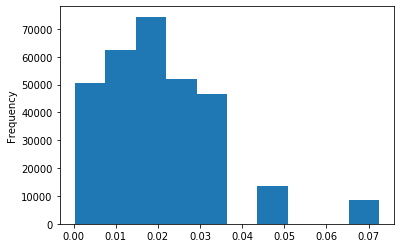

In [149]:
a_df.REGION_POPULATION_RELATIVE.plot.hist()
plt.show()

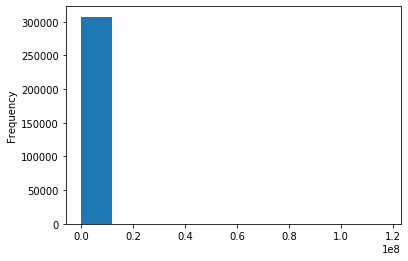

In [150]:
a_df.AMT_INCOME_TOTAL.plot.hist()

In [151]:
round(a_df.AMT_INCOME_TOTAL.describe(),1)

count       307511.0
mean        168797.9
std         237123.1
min          25650.0
25%         112500.0
50%         147150.0
75%         202500.0
max      117000000.0
Name: AMT_INCOME_TOTAL, dtype: float64

In [152]:
a_df.AMT_INCOME_TOTAL.quantile([0.9,.95,.999,0])

0.900    270000.0
0.950    337500.0
0.999    900000.0
0.000     25650.0
Name: AMT_INCOME_TOTAL, dtype: float64

In [153]:
a_df[a_df['AMT_INCOME_TOTAL']>900000].AMT_INCOME_TOTAL.sort_values(ascending=False)

12840     117000000.0
203693     18000090.0
246858     13500000.0
77768       9000000.0
131127      6750000.0
             ...     
196412       945000.0
306285       936000.0
119681       931365.0
263299       909000.0
53936        900450.0
Name: AMT_INCOME_TOTAL, Length: 278, dtype: float64

#### Dropoff the rows with outlier AMT_INCOME_TOTAL as it may skew up the analysis
Not executing the below command as it was suggested only to propose the strategy

In [154]:
#a_df = a_df[a_df.AMT_INCOME_TOTAL < 900000]

#### The column 'DAYS_EMPLOYED' seems to have a garbage value.
The garbage value skews up the analysis. Remove the garbage value and replace with null for now.

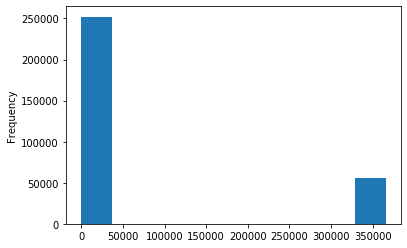

In [155]:
a_df.DAYS_EMPLOYED.plot.hist()
plt.show()

In [156]:
a_df.DAYS_EMPLOYED.replace(365243,np.nan,inplace=True)

#### Post fixing the garbage value, still the column has some outliers but they are continuous. Hence, proposing to choose the median value to replace the missing values instead of mean value.

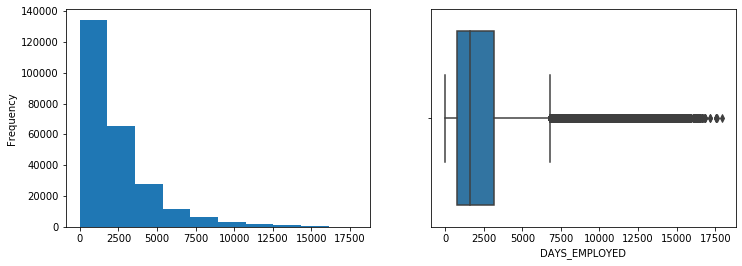

In [157]:
plt.figure(figsize=(12,4))
plt.subplot(121)
a_df.DAYS_EMPLOYED.plot.hist()
plt.subplot(122)
sns.boxplot(a_df.DAYS_EMPLOYED)

plt.show()

In [158]:
a_df.DAYS_EMPLOYED.describe()

count    252137.000000
mean       2384.169325
std        2338.360162
min           0.000000
25%         767.000000
50%        1648.000000
75%        3175.000000
max       17912.000000
Name: DAYS_EMPLOYED, dtype: float64

#### 1.6 Converting the values to more appropriate values
As the column DAYS_BIRTH indicates the no. of days post birth of the candidate, it will be good if this can be converted into age which is more referential for analysis.

In [159]:
a_df['AGE'] = a_df.DAYS_BIRTH // 365

In [160]:
a_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,...,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,NO_OF_DOCUMENTS,AGE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637.0,3648,2120,1,1,0,1,...,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,1134.0,0.0,0.0,0.0,0.0,0.0,1.0,1,25
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188.0,1186,291,1,1,0,1,...,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,828.0,0.0,0.0,0.0,0.0,0.0,0.0,1,45
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225.0,4260,2531,1,1,1,1,...,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,815.0,0.0,0.0,0.0,0.0,0.0,0.0,0,52
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,3039.0,9833,2437,1,1,0,1,...,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,617.0,NaN,NaN,NaN,NaN,NaN,NaN,1,52
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,3038.0,4311,3458,1,1,0,1,...,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,1106.0,0.0,0.0,0.0,0.0,0.0,0.0,1,54


### 1.7 Binning some of the columns
The below columns can be binned as described below for better analysis.

1. AGE
2. AMT_INCOME_TOTAL
3. AMT_GOODS_PRICE
4. DAYS_EMPLOYED
5. EXT_SOURCE_2
6. REGION_POPULATION_RELATIVE

#### Bin the AGE into following categories
1. Youth (20-35) - The Minimum age in the data is 21
2. Middle_age (35-50)
3. Veterans (50 & Above)

In [161]:
a_df.AGE.quantile([0.3,0.6,0.9,1])

0.3    36.0
0.6    47.0
0.9    60.0
1.0    69.0
Name: AGE, dtype: float64

In [162]:
a_df['AGE_CATEGORY'] = pd.cut(a_df.AGE,[20, 35, 50, 100], labels = ['Youth', 'Middle_Age', 'Veterans'])

In [163]:
a_df.AGE_CATEGORY.value_counts()

Middle_Age    118081
Veterans       97187
Youth          92242
Name: AGE_CATEGORY, dtype: int64

#### Bin the Income into following categories
1. Low
2. Below Average
3. Above Avarage
4. High
5. Very High

In [164]:
a_df['AMT_INCOME_SECTION'] = pd.cut(a_df.AMT_INCOME_TOTAL,[0, 112000, 145000, 200000, 300000, 5000000], labels = ['Low', 'Below_Average', 'Above_Average', 'High', 'Very_high'])

In [165]:
a_df.AMT_INCOME_SECTION.value_counts()

Below_Average    84115
Low              69542
Above_Average    65939
High             65176
Very_high        22734
Name: AMT_INCOME_SECTION, dtype: int64

#### Bin the Goods Price into following categories
1. Low
2. Average
3. High
4. Very High

In [166]:
a_df.AMT_GOODS_PRICE.quantile([0.3,0.6,0.9,0.95,1])

0.30     270000.0
0.60     522000.0
0.90    1093500.0
0.95    1305000.0
1.00    4050000.0
Name: AMT_GOODS_PRICE, dtype: float64

In [167]:
a_df.AMT_GOODS_PRICE.min()

40500.0

In [168]:
a_df['AMT_GOODS_SECTION'] = pd.cut(a_df.AMT_GOODS_PRICE,[0, 250000, 500000, 1000000, 50000000], labels = ['Low', 'Average', 'High', 'Very_High'])

In [169]:
a_df.AMT_GOODS_SECTION.value_counts()

Average      97727
High         90496
Low          84891
Very_High    34119
Name: AMT_GOODS_SECTION, dtype: int64

#### Bin the Employment Experience into following categories:
1. Junior
2. Senior
3. Middle
4. Highly_Exp

In [170]:
a_df.DAYS_EMPLOYED.quantile([0.3,0.6,0.9,0.95,1])

0.30      919.0
0.60     2160.0
0.90     5333.0
0.95     7291.0
1.00    17912.0
Name: DAYS_EMPLOYED, dtype: float64

In [171]:
a_df['EMPLOYMENT_EXP'] = pd.cut(a_df.DAYS_EMPLOYED,[0, 1000, 2000, 5000, 50000], labels = ['Junior', 'Middle', 'Senior', 'Highly_Exp'])

In [172]:
a_df.EMPLOYMENT_EXP.value_counts()

Junior        82196
Senior        78150
Middle        62454
Highly_Exp    29335
Name: EMPLOYMENT_EXP, dtype: int64

#### Bin the External Source Score into following Categories
1. Low
2. Good
3. Better
4. Best

In [173]:
a_df.EXT_SOURCE_2.describe()

count    3.068510e+05
mean     5.143927e-01
std      1.910602e-01
min      8.173617e-08
25%      3.924574e-01
50%      5.659614e-01
75%      6.636171e-01
max      8.549997e-01
Name: EXT_SOURCE_2, dtype: float64

In [174]:
a_df.EXT_SOURCE_2.quantile([0.3,0.6,0.9,1])

0.3    0.440478
0.6    0.608318
0.9    0.722047
1.0    0.855000
Name: EXT_SOURCE_2, dtype: float64

In [175]:
a_df['EXT_SOURCE_SCORE'] = pd.cut(a_df.EXT_SOURCE_2,[0, 0.4, 0.6, 0.7, 1], labels = ['Low', 'Good', 'Better', 'Best'])

In [176]:
a_df.EXT_SOURCE_SCORE.value_counts()

Good      98869
Better    82426
Low       78943
Best      46613
Name: EXT_SOURCE_SCORE, dtype: int64

#### Bin the Relative Population Region into following Categories
1. Low
2. Average
3. High
4. Very High

In [177]:
a_df.REGION_POPULATION_RELATIVE.quantile([0.3,0.6,0.9,1])

0.3    0.010643
0.6    0.020713
0.9    0.035792
1.0    0.072508
Name: REGION_POPULATION_RELATIVE, dtype: float64

In [178]:
a_df['REGION_POPULATION_CAT'] = pd.cut(a_df.REGION_POPULATION_RELATIVE,[0, 0.01, 0.02, 0.03, 1], labels = ['Low', 'Average', 'High', 'Very_High'])

In [179]:
a_df.REGION_POPULATION_CAT.value_counts()

Average      97462
Low          74561
Very_High    68382
High         67106
Name: REGION_POPULATION_CAT, dtype: int64

In [180]:
a_df.shape

(307511, 61)

#### Store the dataframe for further univariate & bivariate analysis

In [181]:
a_df.to_csv('appl_data_post_binning.csv')